<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

Due EOD Monday Oct 20

If you wish to do the alternative (written) oral test please advise Yiru **before the morning of Monday Oct 20th**.



# Question 1

You have two circles:

$$ \begin{align}
[x -2]^2 + y^2 &= 4 \\
x^2 + [y-3]^2 &= 4
\end{align} $$

and you want to find where they cross.

a) Write out $\vec{f}({\vec{x}})$

{answer}

In [1]:
import sympy as sp

x, y = sp.symbols('x y')

# Define the functions for the two circle equations
f1 = (x - 2)**2 + y**2 - 4
f2 = x**2 + (y - 3)**2 - 4

# Define the function vector f(x)
f_vec = sp.Matrix([f1, f2])

print("f(x):")
display(f_vec)

f(x):


Matrix([
[y**2 + (x - 2)**2 - 4],
[x**2 + (y - 3)**2 - 4]])

b) Write out the Jacobian $J(\vec{x})$

{answer}

In [2]:
# Calculate the Jacobian matrix
J = f_vec.jacobian([x, y])

print("Jacobian J(x):")
display(J)

Jacobian J(x):


Matrix([
[2*x - 4,     2*y],
[    2*x, 2*y - 6]])

c) Write a Newton-Raphson method and use it to find where the circles cross (*Don't use a nonlinear solver package - show the algorithm down to the linear solver!*)

{implementation, answer x2}

In [3]:
import numpy as np
import sympy as sp

# Define the symbols and functions again for clarity in this cell
x, y = sp.symbols('x y')
f1 = (x - 2)**2 + y**2 - 4
f2 = x**2 + (y - 3)**2 - 4
f_vec = sp.Matrix([f1, f2])
J = f_vec.jacobian([x, y])

# Convert symbolic expressions to numerical functions
f_numerical = sp.lambdify([x, y], f_vec, 'numpy')
J_numerical = sp.lambdify([x, y], J, 'numpy')

# Newton-Raphson method
def newton_raphson(f, J, x0, tol=1e-9, max_iter=100):
    x = x0
    for i in range(max_iter):
        f_val = f(x[0], x[1]).flatten()
        J_val = J(x[0], x[1])

        # Solve the linear system J * delta_x = -f
        delta_x = np.linalg.solve(J_val, -f_val)

        x = x + delta_x

        # Check for convergence
        if np.linalg.norm(delta_x) < tol:
            print(f"Converged in {i+1} iterations.")
            return x

    print("Did not converge within maximum iterations.")
    return x

# Initial guess (can be changed to find the other intersection)
initial_guess1 = np.array([1.0, 1.0])
initial_guess2 = np.array([3.0, 2.0])


# Find the intersection points
intersection_point1 = newton_raphson(f_numerical, J_numerical, initial_guess1)
print("\nIntersection Point 1:")
print(intersection_point1)

intersection_point2 = newton_raphson(f_numerical, J_numerical, initial_guess2)
print("\nIntersection Point 2:")
print(intersection_point2)

Converged in 7 iterations.

Intersection Point 1:
[0.27942331 1.01961554]
Converged in 6 iterations.

Intersection Point 2:
[1.72057669 1.98038446]


# Question 2:

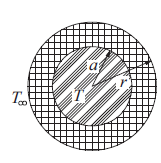

A wire carrying an electric current is surrounded by rubber insulation of outer radius $r$. The resistance of the wire generates heat, which is conducted through the insulation and convected into the surrounding air. The temperature of the wire can be shown to be:

$$ T = \frac{q}{2 \pi} \bigg[ \frac{ln(r/a)}{k} + \frac{1}{hr} \bigg] + T_\infty $$

where

- q = rate of heat generation in wire = 50 W/m
- a = radius of wire = 5mm
- k = thermal conductivity of rubber = 0.16 W/m · K
- h = convective heat-transfer coefficient = 20 W/m2 · K
- T∞ = ambient temperature = 280 K

Find $r$ that minimizes $T$

{method, imlementation, answer}


In [4]:
import sympy as sp

# Define symbolic variable and constants
r = sp.symbols('r')
q = 50   # W/m
a = 5e-3 # m (converted from 5mm)
k = 0.16 # W/m K
h = 20   # W/m^2 K
T_inf = 280 # K

# Define the temperature function T(r)
T = (q / (2 * sp.pi)) * ((sp.ln(r / a) / k) + (1 / (h * r))) + T_inf

# Calculate the derivative of T with respect to r
dT_dr = sp.diff(T, r)

print("Derivative of T with respect to r:")
display(dT_dr)

# To find the minimum, set the derivative to zero and solve for r
# We are looking for r > a
solutions = sp.solve(dT_dr, r)

print("\nSolutions for r where dT/dr = 0:")
display(solutions)

# Filter for physically meaningful solutions (r > a)
# In this case, the solve function might return complex solutions or other non-physical ones.
# We expect a single positive real solution greater than 'a'.

# Let's evaluate the real solutions and check if they are positive and greater than 'a'
meaningful_r = [sol.evalf() for sol in solutions if sol.is_real and sol > a]

print(f"\nMeaningful solution(s) for r (r > {a}):")
display(meaningful_r)

# Assuming there's a single meaningful solution, take that as the minimizing r
if meaningful_r:
    r_minimize_T = meaningful_r[0]
    print(f"\nThe value of r that minimizes T is approximately: {r_minimize_T:.6f} m")
    # Calculate the minimum temperature at this r
    min_T = T.subs(r, r_minimize_T)
    print(f"The minimum temperature at this r is approximately: {min_T:.6f} K")
else:
    print("\nCould not find a meaningful value of r that minimizes T.")

Derivative of T with respect to r:


25*(6.25/r - 1/(20*r**2))/pi


Solutions for r where dT/dr = 0:


[0.00800000000000000]


Meaningful solution(s) for r (r > 0.005):


[0.00800000000000000]


The value of r that minimizes T is approximately: 0.008000 m
The minimum temperature at this r is approximately: 353.111982 K


# Question 3:

{Method, answer}

Given the data in (T, k) columns,

In [ ]:
import numpy as np
data = np.array([[2.73000000e+02, 4.45900132e+03],
       [2.76030303e+02, 4.41776331e+03],
       [2.79060606e+02, 7.02912764e+03],
       [2.82090909e+02, 8.07233255e+03],
       [2.85121212e+02, 1.35655353e+04],
       [2.88151515e+02, 1.53935301e+04],
       [2.91181818e+02, 1.66518521e+04],
       [2.94212121e+02, 2.57056205e+04],
       [2.97242424e+02, 2.80402378e+04],
       [3.00272727e+02, 3.52850720e+04],
       [3.03303030e+02, 2.53348206e+04],
       [3.06333333e+02, 6.20422294e+04],
       [3.09363636e+02, 5.65720969e+04],
       [3.12393939e+02, 8.94469023e+04],
       [3.15424242e+02, 9.65941942e+04],
       [3.18454545e+02, 1.14139663e+05],
       [3.21484848e+02, 1.00384893e+05],
       [3.24515152e+02, 1.60315046e+05],
       [3.27545455e+02, 1.75487522e+05],
       [3.30575758e+02, 2.79200552e+05],
       [3.33606061e+02, 2.83492579e+05],
       [3.36636364e+02, 2.19343286e+05],
       [3.39666667e+02, 3.46339717e+05],
       [3.42696970e+02, 3.29907107e+05],
       [3.45727273e+02, 2.99334626e+05],
       [3.48757576e+02, 4.85091915e+05],
       [3.51787879e+02, 7.28675595e+05],
       [3.54818182e+02, 9.91612106e+05],
       [3.57848485e+02, 9.39914377e+05],
       [3.60878788e+02, 1.46925677e+06],
       [3.63909091e+02, 1.46126057e+06],
       [3.66939394e+02, 1.35738053e+06],
       [3.69969697e+02, 1.14736966e+06],
       [3.73000000e+02, 2.10254656e+06],
       [3.76030303e+02, 1.12017395e+06],
       [3.79060606e+02, 2.34226319e+06],
       [3.82090909e+02, 2.22858410e+06],
       [3.85121212e+02, 3.26613076e+06],
       [3.88151515e+02, 3.68055559e+06],
       [3.91181818e+02, 2.37869512e+06],
       [3.94212121e+02, 4.10021974e+06],
       [3.97242424e+02, 3.84314791e+06],
       [4.00272727e+02, 6.46893402e+06],
       [4.03303030e+02, 5.35422811e+06],
       [4.06333333e+02, 7.73962115e+06],
       [4.09363636e+02, 8.41409713e+06],
       [4.12393939e+02, 7.81006766e+06],
       [4.15424242e+02, 8.35579617e+06],
       [4.18454545e+02, 1.03669786e+07],
       [4.21484848e+02, 1.02992887e+07],
       [4.24515152e+02, 6.39189417e+06],
       [4.27545455e+02, 1.36405449e+07],
       [4.30575758e+02, 1.49410729e+07],
       [4.33606061e+02, 2.09149077e+07],
       [4.36636364e+02, 2.14703032e+07],
       [4.39666667e+02, 2.11464887e+07],
       [4.42696970e+02, 2.60359855e+07],
       [4.45727273e+02, 3.19593647e+07],
       [4.48757576e+02, 2.84547486e+07],
       [4.51787879e+02, 2.98421720e+07],
       [4.54818182e+02, 3.54693846e+07],
       [4.57848485e+02, 4.17941703e+07],
       [4.60878788e+02, 4.65948030e+07],
       [4.63909091e+02, 5.74740135e+07],
       [4.66939394e+02, 4.12282427e+07],
       [4.69969697e+02, 6.43295352e+07],
       [4.73000000e+02, 6.78921367e+07],
       [4.76030303e+02, 6.87155479e+07],
       [4.79060606e+02, 6.70678776e+07],
       [4.82090909e+02, 6.23342574e+07],
       [4.85121212e+02, 9.48617775e+07],
       [4.88151515e+02, 9.34710486e+07],
       [4.91181818e+02, 8.25781385e+07],
       [4.94212121e+02, 1.02888832e+08],
       [4.97242424e+02, 9.99071191e+07],
       [5.00272727e+02, 1.01319698e+08],
       [5.03303030e+02, 1.32602108e+08],
       [5.06333333e+02, 1.31923942e+08],
       [5.09363636e+02, 1.00146518e+08],
       [5.12393939e+02, 1.48398130e+08],
       [5.15424242e+02, 2.01128065e+08],
       [5.18454545e+02, 2.25792703e+08],
       [5.21484848e+02, 1.99863590e+08],
       [5.24515152e+02, 2.47074414e+08],
       [5.27545455e+02, 2.08548654e+08],
       [5.30575758e+02, 1.83449792e+08],
       [5.33606061e+02, 2.58856094e+08],
       [5.36636364e+02, 3.10038100e+08],
       [5.39666667e+02, 3.58956357e+08],
       [5.42696970e+02, 3.21512830e+08],
       [5.45727273e+02, 4.30773903e+08],
       [5.48757576e+02, 4.39179856e+08],
       [5.51787879e+02, 4.57110476e+08],
       [5.54818182e+02, 3.75292342e+08],
       [5.57848485e+02, 3.97574548e+08],
       [5.60878788e+02, 4.57516936e+08],
       [5.63909091e+02, 2.63845055e+08],
       [5.66939394e+02, 4.59249219e+08],
       [5.69969697e+02, 5.23677345e+08],
       [5.73000000e+02, 7.51098462e+08]])

fit a modified Arrhenius curve of the form:

$$k = [A +B T]e^{\frac{-E}{RT}} $$

where $R$ is the Ideal gas constant.




/tmp/ipython-input-3157827757.py:112: RuntimeWarning: overflow encountered in exp
  return (A + B * T) * np.exp(-E / (R * T))
/tmp/ipython-input-3157827757.py:112: RuntimeWarning: overflow encountered in multiply
  return (A + B * T) * np.exp(-E / (R * T))


Fitted Parameters:
A: 1.4163e+14
B: -1.3364e+11
E: 5.5401e+04

Standard deviations of fitted parameters:
Std Dev A: 8.3573e+14
Std Dev B: 1.0442e+12
Std Dev E: 1.7516e+04

R-squared value: 0.9451


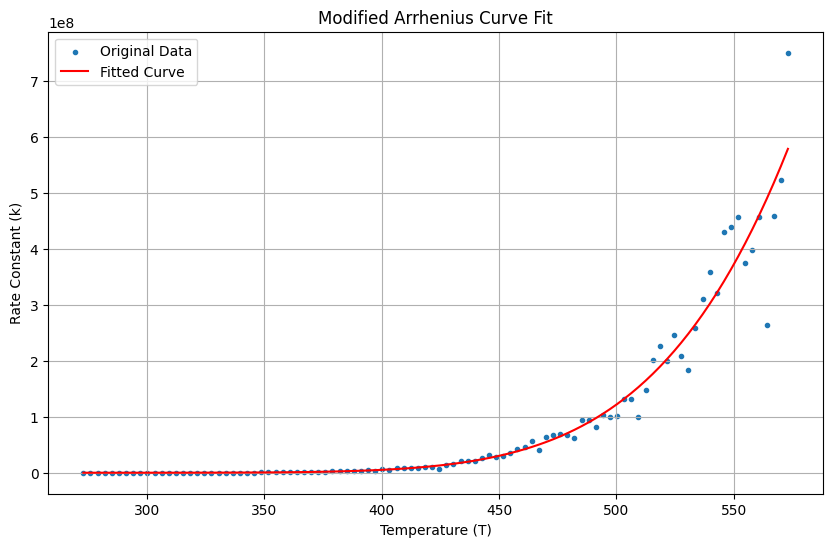

In [5]:
from scipy.optimize import curve_fit
import numpy as np

# The provided data
data = np.array([[2.73000000e+02, 4.45900132e+03],
       [2.76030303e+02, 4.41776331e+03],
       [2.79060606e+02, 7.02912764e+03],
       [2.82090909e+02, 8.07233255e+03],
       [2.85121212e+02, 1.35655353e+04],
       [2.88151515e+02, 1.53935301e+04],
       [2.91181818e+02, 1.66518521e+04],
       [2.94212121e+02, 2.57056205e+04],
       [2.97242424e+02, 2.80402378e+04],
       [3.00272727e+02, 3.52850720e+04],
       [3.03303030e+02, 2.53348206e+04],
       [3.06333333e+02, 6.20422294e+04],
       [3.09363636e+02, 5.65720969e+04],
       [3.12393939e+02, 8.94469023e+04],
       [3.15424242e+02, 9.65941942e+04],
       [3.18454545e+02, 1.14139663e+05],
       [3.21484848e+02, 1.00384893e+05],
       [3.24515152e+02, 1.60315046e+05],
       [3.27545455e+02, 1.75487522e+05],
       [3.30575758e+02, 2.79200552e+05],
       [3.33606061e+02, 2.83492579e+05],
       [3.36636364e+02, 2.19343286e+05],
       [3.39666667e+02, 3.46339717e+05],
       [3.42696970e+02, 3.29907107e+05],
       [3.45727273e+02, 2.99334626e+05],
       [3.48757576e+02, 4.85091915e+05],
       [3.51787879e+02, 7.28675595e+05],
       [3.54818182e+02, 9.91612106e+05],
       [3.57848485e+02, 9.39914377e+05],
       [3.60878788e+02, 1.46925677e+06],
       [3.63909091e+02, 1.46126057e+06],
       [3.66939394e+02, 1.35738053e+06],
       [3.69969697e+02, 1.14736966e+06],
       [3.73000000e+02, 2.10254656e+06],
       [3.76030303e+02, 1.12017395e+06],
       [3.79060606e+02, 2.34226319e+06],
       [3.82090909e+02, 2.22858410e+06],
       [3.85121212e+02, 3.26613076e+06],
       [3.88151515e+02, 3.68055559e+06],
       [3.91181818e+02, 2.37869512e+06],
       [3.94212121e+02, 4.10021974e+06],
       [3.97242424e+02, 3.84314791e+06],
       [4.00272727e+02, 6.46893402e+06],
       [4.03303030e+02, 5.35422811e+06],
       [4.06333333e+02, 7.73962115e+06],
       [4.09363636e+02, 8.41409713e+06],
       [4.12393939e+02, 7.81006766e+06],
       [4.15424242e+02, 8.35579617e+06],
       [4.18454545e+02, 1.03669786e+07],
       [4.21484848e+02, 1.02992887e+07],
       [4.24515152e+02, 6.39189417e+06],
       [4.27545455e+02, 1.36405449e+07],
       [4.30575758e+02, 1.49410729e+07],
       [4.33606061e+02, 2.09149077e+07],
       [4.36636364e+02, 2.14703032e+07],
       [4.39666667e+02, 2.11464887e+07],
       [4.42696970e+02, 2.60359855e+07],
       [4.45727273e+02, 3.19593647e+07],
       [4.48757576e+02, 2.84547486e+07],
       [4.51787879e+02, 2.98421720e+07],
       [4.54818182e+02, 3.54693846e+07],
       [4.57848485e+02, 4.17941703e+07],
       [4.60878788e+02, 4.65948030e+07],
       [4.63909091e+02, 5.74740135e+07],
       [4.66939394e+02, 4.12282427e+07],
       [4.69969697e+02, 6.43295352e+07],
       [4.73000000e+02, 6.78921367e+07],
       [4.76030303e+02, 6.87155479e+07],
       [4.79060606e+02, 6.70678776e+07],
       [4.82090909e+02, 6.23342574e+07],
       [4.85121212e+02, 9.48617775e+07],
       [4.88151515e+02, 9.34710486e+07],
       [4.91181818e+02, 8.25781385e+07],
       [4.94212121e+02, 1.02888832e+08],
       [4.97242424e+02, 9.99071191e+07],
       [5.00272727e+02, 1.01319698e+08],
       [5.03303030e+02, 1.32602108e+08],
       [5.06333333e+02, 1.31923942e+08],
       [5.09363636e+02, 1.00146518e+08],
       [5.12393939e+02, 1.48398130e+08],
       [5.15424242e+02, 2.01128065e+08],
       [5.18454545e+02, 2.25792703e+08],
       [5.21484848e+02, 1.99863590e+08],
       [5.24515152e+02, 2.47074414e+08],
       [5.27545455e+02, 2.08548654e+08],
       [5.30575758e+02, 1.83449792e+08],
       [5.33606061e+02, 2.58856094e+08],
       [5.36636364e+02, 3.10038100e+08],
       [5.39666667e+02, 3.58956357e+08],
       [5.42696970e+02, 3.21512830e+08],
       [5.45727273e+02, 4.30773903e+08],
       [5.48757576e+02, 4.39179856e+08],
       [5.51787879e+02, 4.57110476e+08],
       [5.54818182e+02, 3.75292342e+08],
       [5.57848485e+02, 3.97574548e+08],
       [5.60878788e+02, 4.57516936e+08],
       [5.63909091e+02, 2.63845055e+08],
       [5.66939394e+02, 4.59249219e+08],
       [5.69969697e+02, 5.23677345e+08],
       [5.73000000e+02, 7.51098462e+08]])

T_data = data[:, 0]
k_data = data[:, 1]

# Define the modified Arrhenius function
def modified_arrhenius(T, A, B, E):
    R = 8.314  # Ideal gas constant J/mol K
    return (A + B * T) * np.exp(-E / (R * T))

# Use curve_fit to find the parameters A, B, and E
# Provide initial guesses for the parameters (A, B, E)
# These initial guesses can significantly affect the outcome of the fit.
# Based on the data scale and the form of the function, let's make some educated guesses.
# The k values range from thousands to hundreds of millions.
# The exponential term will be between 0 and 1.
# A and B*T will likely be the main contributors to the magnitude of k.
# Let's guess A and B are around 1e6, and E is around 50000 (typical activation energy in J/mol).
initial_guesses = [1e6, 1e4, 50000]


params, covariance = curve_fit(modified_arrhenius, T_data, k_data, p0=initial_guesses)

# Extract the fitted parameters
A_fit, B_fit, E_fit = params

print("Fitted Parameters:")
print(f"A: {A_fit:.4e}")
print(f"B: {B_fit:.4e}")
print(f"E: {E_fit:.4e}")

# Optionally, calculate the standard deviations of the fitted parameters
perr = np.sqrt(np.diag(covariance))
print("\nStandard deviations of fitted parameters:")
print(f"Std Dev A: {perr[0]:.4e}")
print(f"Std Dev B: {perr[1]:.4e}")
print(f"Std Dev E: {perr[2]:.4e}")

# You can also calculate the R-squared value to evaluate the goodness of fit
# R^2 = 1 - (sum of squares of residuals) / (total sum of squares)
residuals = k_data - modified_arrhenius(T_data, A_fit, B_fit, E_fit)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((k_data - np.mean(k_data))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"\nR-squared value: {r_squared:.4f}")

# To visually check the fit, you can plot the original data and the fitted curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(T_data, k_data, label='Original Data', marker='.')
plt.plot(T_data, modified_arrhenius(T_data, A_fit, B_fit, E_fit), color='red', label='Fitted Curve')
plt.xlabel('Temperature (T)')
plt.ylabel('Rate Constant (k)')
plt.title('Modified Arrhenius Curve Fit')
plt.legend()
plt.grid(True)
plt.show()